# Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [ ]:
df = pd.read_csv("ksadjlad.csv")

In [ ]:
df.dtypes

# Clustering example

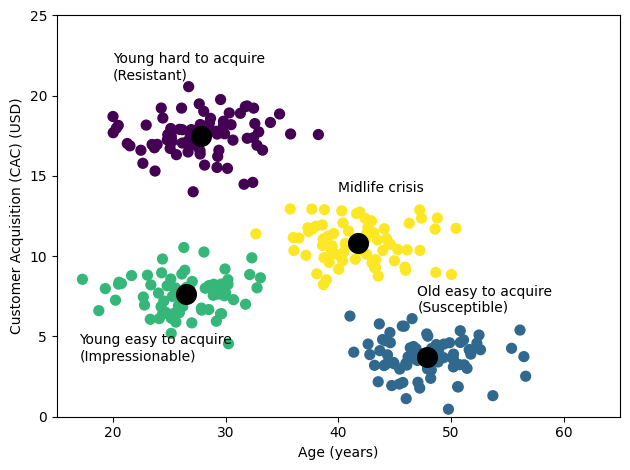

In [14]:

#Generated synthetic data
X, y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=25);

kmeans = KMeans(n_clusters=4)#, random_state=0) #we have to tell it the number of clusters
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.5)
centers = kmeans.cluster_centers_   
plt.scatter(centers[:, 0],centers[:, 1], s=200, c='red', marker='X', label='Centroids')

x = (X[:, 0]+6)*6
x_c = (centers[:, 0]+6)*6
y = 2*(X[:, 1] + 1)
y_c = 2*(centers[:, 1]+1)
plt.scatter(x, y, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_   
plt.scatter(x_c, y_c, c='black', s=200);
plt.xlabel("Age (years)")
plt.ylabel("Customer Acquisition (CAC) (USD)")
plt.text(20, 21, "Young hard to acquire\n(Resistant)")
plt.text(17, 3.5, "Young easy to acquire\n(Impressionable)")
plt.text(40, 14, "Midlife crisis")
plt.text(47, 6.5, "Old easy to acquire\n(Susceptible)")
plt.ylim(0,25)
plt.xlim(15,65)

plt.tight_layout()
plt.savefig("clustering_example.png")

# Trends

In [3]:
#data source: https://gs.statcounter.com/vendor-market-share/mobile
region = ["af", "as", "eu", "na", "oc", "sa"] #Africa, Asia, Europe, North America, Oceania, South America
#region = ["sa"]
dates = ["201001-201012", "201301-201312", "201601-201612",
        "201901-201912", "202201-202212"]
#dates = ["201301-201312", "201601-201612",
#        "201901-201912", "202201-202212"]

for i, r in enumerate(region):
    for i2, d in enumerate(dates):
        f = "vendor-" + r + "-monthly-" + d + ".csv"
        t = pd.read_csv(f)
        t = t.melt(id_vars = "Date", value_vars = t.columns[1:], value_name = "Mkt_Share", var_name = "Company")
        t.insert(t.shape[1], "Region", r)
        if i == 0 and i2 == 0:
            df = t 
        else:
            df = pd.concat([df, t])
df.reset_index(drop = True, inplace = True)
#df

In [98]:
df

,Date,Company,Mkt_Share,Region
0,2010-04,Nokia,84.99,af
1,2010-05,Nokia,84.31,af
2,2010-06,Nokia,80.74,af
3,2010-07,Nokia,79.15,af
4,2010-08,Nokia,78.18,af
...,...,...,...,...
10975,2022-08,Other,0.08,sa
10976,2022-09,Other,0.08,sa
10977,2022-10,Other,0.08,sa
10978,2022-11,Other,0.07,sa


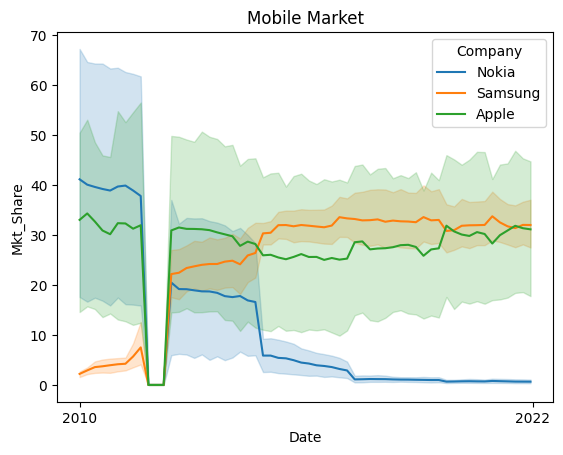

In [108]:
idx = (df.loc[:,"Company"] == "Nokia") | (df.loc[:,"Company"] == "Samsung") | (df.loc[:,"Company"] == "Apple")
sns.lineplot(df.loc[idx,:], x = "Date", y = "Mkt_Share", hue = "Company")
plt.xticks([0, df.shape[0]*.0054], ["2010", "2022"])
plt.title("Mobile Market")
plt.savefig("MobileMarket.png")

In [5]:
df = df.astype({"Company": "category"})
df.dtypes

Date           object
Company      category
Mkt_Share     float64
Region         object
dtype: object